In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt


X, y = datasets.make_regression(n_samples=100,
                                n_features=1,
                                noise=15,
                                random_state=1111)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1111)

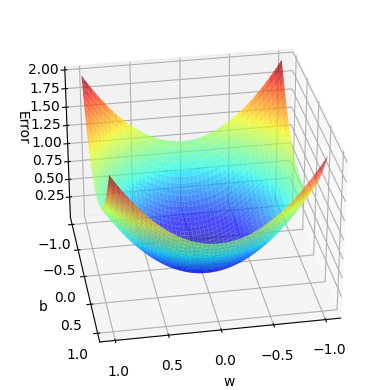

In [2]:
X = np.linspace(-1, 1, 100)
Y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(X, Y)
Z = X**2 + Y**2

ax = plt.figure(figsize=(4, 4)).add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet', alpha=0.7)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Error')
ax.azim = 80
plt.tight_layout()
plt.show()

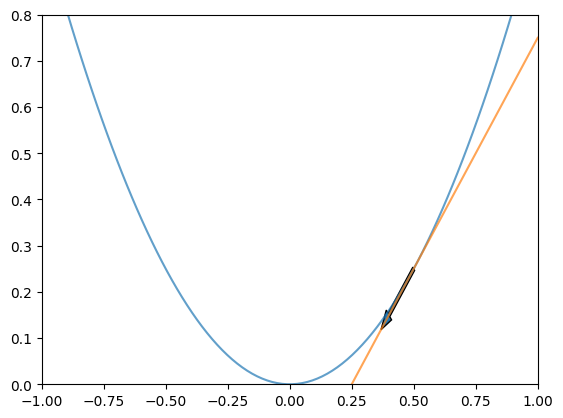

In [3]:
x = np.linspace(-1, 1, 100)
y = x**2

t = 0.5
dy = 2*t
b = -0.25

plt.plot(x, y, alpha=0.7)
plt.plot(x, dy*x + b, alpha=0.7)
plt.arrow(t, dy*t+b, -0.1, -0.1, width=0.01)
plt.xlim(-1, 1)
plt.ylim(0, 0.8)
plt.show()

In [4]:
class LinearRegression:

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted
    
def mse(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)

In [5]:
lin_reg = LinearRegression(lr=0.01)
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
loss = mse(y_test, y_pred)
print(loss)

268.1948204341608


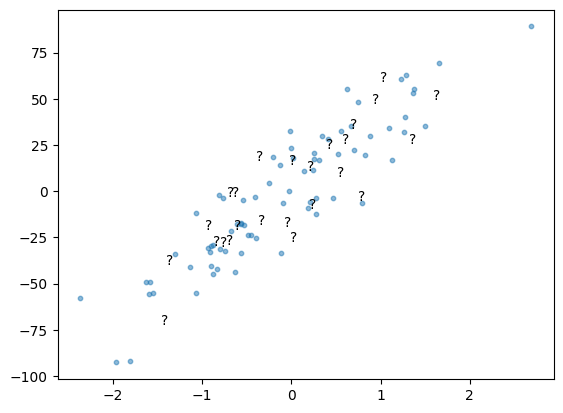

In [6]:
plt.scatter(X_train[:, 0], y_train, alpha=0.5, s=10)
for i in range(len(X_test)):
    plt.text(X_test[i, 0], y_test[i], s='?')

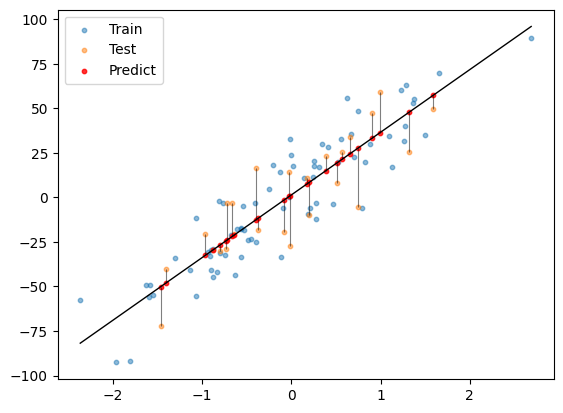

In [7]:
x_array = np.linspace(X_train.min(), X_train.max(), 10)
y_array = [x * lin_reg.weights + lin_reg.bias for x in x_array]

plt.scatter(X_train[:, 0], y_train, s=10, alpha=0.5, label='Train')
plt.scatter(X_test[:, 0], y_test, s=10, alpha=0.5, label='Test')
plt.scatter(X_test[:, 0], y_pred, c='r', s=10, alpha=0.8, label='Predict')
plt.plot(x_array, y_array, c='k', linewidth=1)
for i in range(len(X_test)):
    if y_test[i] > y_pred[i]:
        plt.vlines(X_test[i], y_pred[i], y_test[i], colors='k', linewidth=0.8, alpha=0.5)
    else:
        plt.vlines(X_test[i], y_test[i], y_pred[i], colors='k', linewidth=0.8, alpha=0.5)
plt.legend()
plt.show()

In [8]:
X, y = datasets.make_regression(n_samples=100,
                                n_features=2,
                                noise=20,
                                random_state=1111)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=1111)

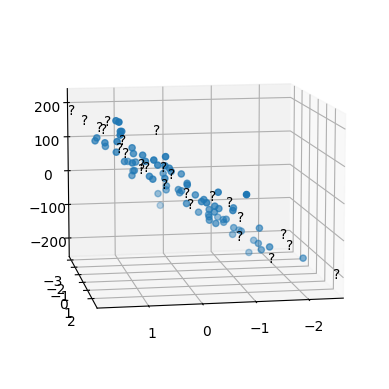

In [9]:
ax = plt.figure().add_subplot(projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train)
for i in range(len(X_test)):
    ax.text(X_test[i, 0], X_test[i, 1], y_test[i], s='?')
ax.view_init(10, 80)

plt.show()

In [10]:
lin_reg = LinearRegression(lr=0.01)
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

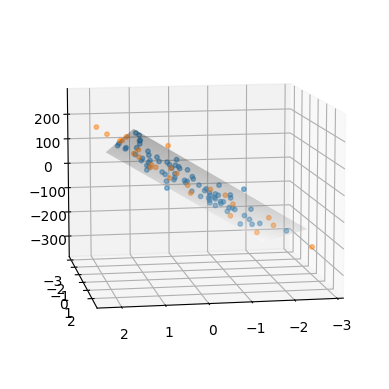

In [11]:
X_0 = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 30)
X_1 = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 30)

X_0, X_1 = np.meshgrid(X_0, X_1)
Z = lin_reg.predict(np.hstack([X_0.reshape(-1, 1), X_1.reshape(-1, 1)])).reshape(30, -1)

ax = plt.figure().add_subplot(projection='3d')
ax.scatter(X_train[:, 0], X_train[:, 1], y_train, s=10, alpha=0.5, label='Train')
ax.scatter(X_test[:, 0], X_test[:, 1], y_test, s=10, alpha=0.5, label='Test')
ax.plot_surface(X_0, X_1, Z, cmap='binary', alpha=0.3)
ax.view_init(10, 80)
plt.show()